<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Logo_ITESO_normal.jpg/240px-Logo_ITESO_normal.jpg" width="70px" height="15px" />
<img style="float: right; margin: 0px 0px 15px 15px;" src="http://planamayor.com.mx/wp-content/uploads/2015/02/Melate-1.jpg" width="350px" height="250px" />


# Simulación de escenarios 1 y 2 Pronosticos Melate
#### Simulación de procesos financieros.
-   Aarón Alejandro Bello Aldrete 
-   Oscar Adolfo Gonzales Zamora  


# Definición del problema 


El Melate es un sorteo que se realizan todos los miércoles y domingos. Una urna selecciona números al alzar los cuales pueden hacerte ganar.

La urna de Melate elegirá de manera aleatoria 6 esferas con los números ganadores, si al menos dos de tus números seleccionados salen en la urna, ya ganaste.

En el Melate se seleccionan 6 números entre 1 y 56, con esos dos datos, 6 y 56, podemos usar  la función Combinación  (tecla nCr) de una calculadora científica, que da el resultado 32,468,436, es decir, hay más de 32 millones resultados posibles, lo que significa una probabilidad de ganar del 0.000003%, tres millonésimas de uno por ciento.

Para este proyecto simularemos cuatro ecesanarios los cuales consistenten en lo siguiente:
- Se desea saber los números mas probables para ganarse el sorteo 'Melate'
- Obtener las ventas de boletos del Melate en 2019
- Cuanta gente ganará el sorteo en 2019
- Conocer el monto $ ganado por las ventas de Melate
 




## Supuestos

- Para ganar, los números de tu boleto deberán coincidir con un mínimo de dos números. 
  
- Más números atinados, mayor el premio.
 
- Ganas el premio mayor atinando 6 números.
  
- Los números no se pueden repetir.

- Solo se puden elegir números del 1 al 56

## Variables

- Números ganadores 
- Número de ventas por año del "Melate"
- Cantidad de personas ganadoras del sorteo
- Ingresos por venta de boletos

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as sc
from scipy import stats 
import scipy.stats as st

%matplotlib inline

In [34]:
melate = 'C:/Users/OEM/Dropbox/8vo/Simulación/Proyecto/Melate.csv'

datos = pd.read_csv(melate, header=0, engine = 'python')
datos

,NPRODUCTO,CONCURSO,R1,R2,R3,R4,R5,R6,BOLSA,FECHA
0,40,3221,30,35,38,41,44,51,144000000,17/10/2018
1,40,3220,21,29,30,36,40,48,139500000,14/10/2018
2,40,3219,19,27,28,29,32,50,135900000,10/10/2018
3,40,3218,18,20,25,30,40,50,131600000,07/10/2018
4,40,3217,13,20,35,40,41,43,127500000,03/10/2018
5,40,3216,13,17,25,32,45,48,122600000,30/09/2018
6,40,3215,11,20,29,32,37,40,119000000,26/09/2018
7,40,3214,11,12,17,31,40,55,115000000,23/09/2018
8,40,3213,10,16,21,26,39,51,111500000,19/09/2018
9,40,3212,10,14,41,42,47,55,107800000,16/09/2018


In [60]:
r1 = datos.iloc[0:3223,2]
r2 = datos.iloc[0:3223,3]
r3 = datos.iloc[0:3223,4]
r4 = datos.iloc[0:3223,5]
r5 = datos.iloc[0:3223,6]
r6 = datos.iloc[0:3223,7]


Primero necesitamos analizar cada número ganador por sí mismo para entender su distribución


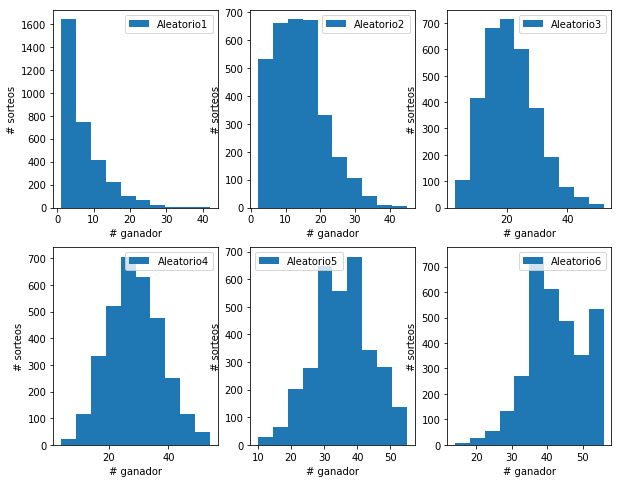

Algunas se asemejan a la distribución normal, por lo que decidimos hacer el ajuste a ésta distribución


In [61]:
print('Primero necesitamos analizar cada número ganador por sí mismo para entender su distribución')
plt.figure(1,figsize=[10,8])
plt.subplot(231)
plt.hist(r1,label='Aleatorio1')
plt.legend()
plt.ylabel('# sorteos')
plt.xlabel('# ganador')

plt.subplot(232)
plt.hist(r2,label='Aleatorio2')
plt.legend()
plt.ylabel('# sorteos')
plt.xlabel('# ganador')

plt.subplot(233)
plt.hist(r3,label='Aleatorio3')
plt.legend()
plt.ylabel('# sorteos')
plt.xlabel('# ganador')

plt.subplot(234)
plt.hist(r4,label='Aleatorio4')
plt.legend()
plt.ylabel('# sorteos')
plt.xlabel('# ganador')

plt.subplot(235)
plt.hist(r5,label='Aleatorio5')
plt.legend()
plt.ylabel('# sorteos')
plt.xlabel('# ganador')

plt.subplot(236)
plt.hist(r6,label='Aleatorio6')
plt.legend()
plt.ylabel('# sorteos')
plt.xlabel('# ganador')
plt.show()

print('Algunas se asemejan a la distribución normal, por lo que decidimos hacer el ajuste a ésta distribución')


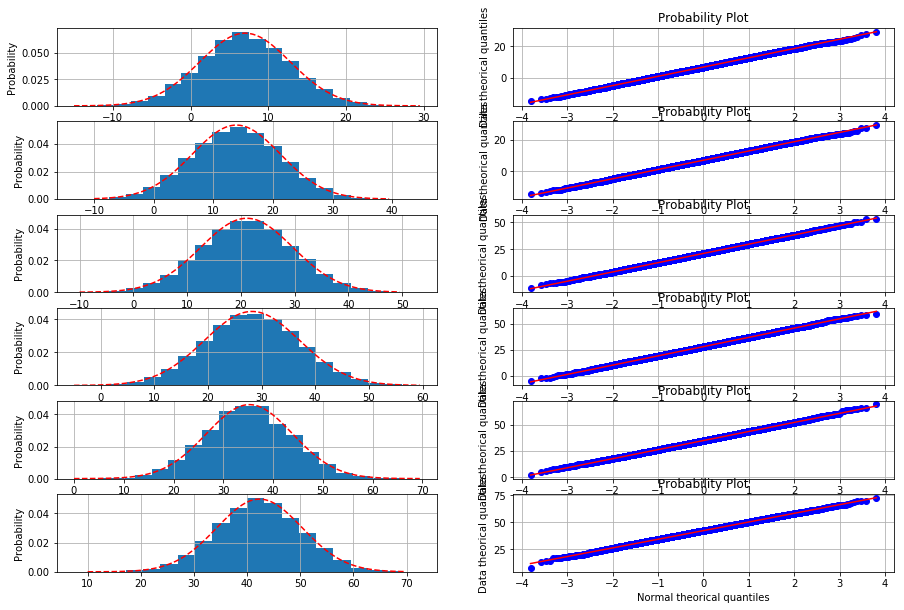

Podemos observar que en todos los casos se ajustan casi perfectamente a una distribución normal


In [62]:
# Ajustando una curva normal

#fig, axes = plt.subplots(nrows=4, ncols=4)
#plt.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.figure(1,figsize=[15,10])

mr1 = np.mean(r1)
dsvr1 = np.std(r1)
measurements = np.random.normal(loc = mr1, scale = dsvr1, size=10000)
plt.figure(1,figsize=[12,4])
plt.subplot(6,2,1)
plt.hist(measurements,20,density=True)
x = np.arange(-15,30,.5)
y = st.norm.pdf(x,loc = mr1, scale = dsvr1)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(6,2,2)
grap1 = st.probplot(measurements, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')


mr2 = np.mean(r2)
dsvr2 = np.std(r2)
measurements2 = np.random.normal(loc = mr2, scale = dsvr2, size=10000)
plt.subplot(6,2,3)
plt.hist(measurements2,20,density=True)
x = np.arange(-10,40,.5)
y = st.norm.pdf(x,loc = mr2, scale = dsvr2)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(6,2,4)
grap2 = st.probplot(measurements, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')

mr3 = np.mean(r3)
dsvr3 = np.std(r3)
measurements3 = np.random.normal(loc = mr3, scale = dsvr3, size=10000)
plt.subplot(6,2,5)
plt.hist(measurements3,20,density=True)
x = np.arange(-10,50,.5)
y = st.norm.pdf(x,loc = mr3, scale = dsvr3)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(6,2,6)
grap3 = st.probplot(measurements3, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')



mr4 = np.mean(r4)
dsvr4 = np.std(r4)
measurements4 = np.random.normal(loc = mr4, scale = dsvr4, size=10000)
plt.subplot(6,2,7)
plt.hist(measurements4,20,density=True)
x = np.arange(-5,60,.5)
y = st.norm.pdf(x,loc = mr4, scale = dsvr4)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(6,2,8)
grap4 = st.probplot(measurements4, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')



mr5 = np.mean(r5)
dsvr5 = np.std(r5)
measurements5 = np.random.normal(loc = mr5, scale = dsvr5, size=10000)
plt.subplot(6,2,9)
plt.hist(measurements5,20,density=True)
x = np.arange(0,70,.5)
y = st.norm.pdf(x,loc = mr5, scale = dsvr5)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(6,2,10)
grap5 = st.probplot(measurements5, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')


mr6 = np.mean(r6)
dsvr6 = np.std(r6)
measurements6 = np.random.normal(loc = mr6, scale = dsvr6, size=10000)
plt.subplot(6,2,11)
plt.hist(measurements6,20,density=True)
x = np.arange(10,70,.5)
y = st.norm.pdf(x,loc = mr6, scale = dsvr6)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(6,2,12)
grap6 = st.probplot(measurements6, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')

plt.show()
print('Podemos observar que en todos los casos se ajustan casi perfectamente a una distribución normal')

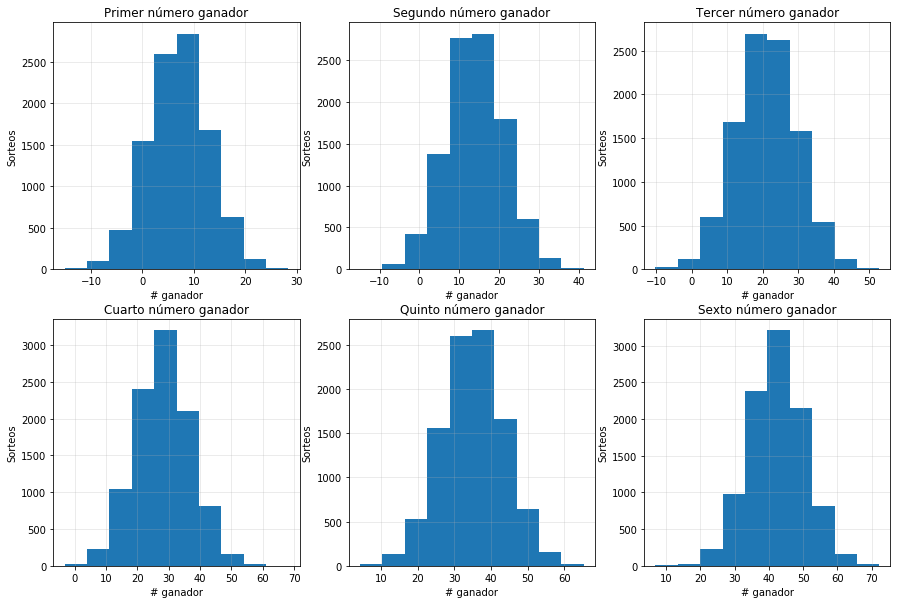

Se realizaron 10000 simulaciones para cada rango de números
Para el primer número del sorteo, los números mas pobables estan entre 7 y 11
Para el segundo número del sorteo, los números mas pobables estan entre 13 y 18
Para el tercero número del sorteo, los números mas pobables estan entre 19 y 23
Para el cuarto número del sorteo, los números mas pobables estan entre 25 y 32
Para el quinto número del sorteo, los números mas pobables estan entre 35 y 42
Para el sexto número del sorteo, los números mas pobables estan entre 43 y 48


In [42]:
N = 10000
plt.figure(1,figsize=[15,10])

R1 = np.random.normal(mr1,dsvr1,N)
plt.subplot(2,3,1)
plt.hist(R1)
plt.ylabel('Sorteos')
plt.xlabel('# ganador')
plt.title('Primer número ganador')
plt.grid(alpha = .3)


R2 = np.random.normal(mr2,dsvr2,N)
plt.subplot(2,3,2)
plt.hist(R2)
plt.ylabel('Sorteos')
plt.xlabel('# ganador')
plt.title('Segundo número ganador')
plt.grid(alpha = .3)

R3 = np.random.normal(mr3,dsvr3,N)
plt.subplot(2,3,3)
plt.hist(R3)
plt.ylabel('Sorteos')
plt.xlabel('# ganador')
plt.title('Tercer número ganador')
plt.grid(alpha = .3)

R4 = np.random.normal(mr4,dsvr4,N)
plt.subplot(2,3,4)
plt.hist(R4)
plt.ylabel('Sorteos')
plt.xlabel('# ganador')
plt.title('Cuarto número ganador')
plt.grid(alpha = .3)

R5 = np.random.normal(mr5,dsvr5,N)
plt.subplot(2,3,5)
plt.hist(R5)
plt.ylabel('Sorteos')
plt.xlabel('# ganador')
plt.title('Quinto número ganador')
plt.grid(alpha = .3)

R6 = np.random.normal(mr6,dsvr6,N)
plt.subplot(2,3,6)
plt.hist(R6)
plt.ylabel('Sorteos')
plt.xlabel('# ganador')
plt.title('Sexto número ganador')
plt.grid(alpha = .3)

plt.show()


print("Se realizaron 10000 simulaciones para cada rango de números")
print("Para el primer número del sorteo, los números mas pobables estan entre 7 y 11")
print("Para el segundo número del sorteo, los números mas pobables estan entre 13 y 18")
print("Para el tercero número del sorteo, los números mas pobables estan entre 19 y 23")
print("Para el cuarto número del sorteo, los números mas pobables estan entre 25 y 32")
print("Para el quinto número del sorteo, los números mas pobables estan entre 35 y 42")
print("Para el sexto número del sorteo, los números mas pobables estan entre 43 y 48")

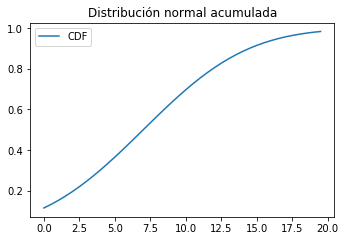

P(T<=5)= 0.3649557344312699


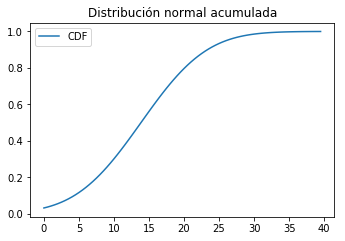

P(T<=15)= 0.5605743959009352


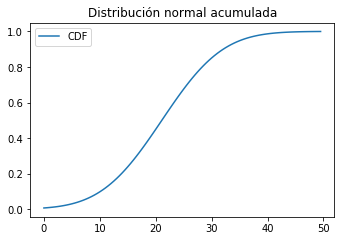

P(T<=20)= 0.44914428094422704


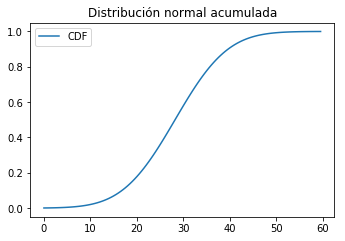

P(T<=30)= 0.5802065028816505


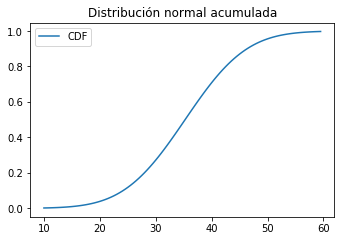

P(T<=37)= 0.5798320695001229


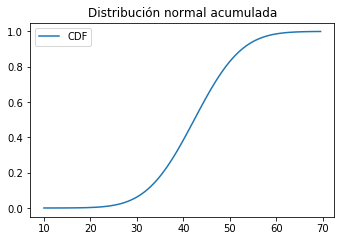

P(T<=44)= 0.5824518027514969


In [63]:
mr1 = np.mean(r1)
dsvr1 = np.std(r1)
x = np.arange(0,20,.5)

y_cdf = st.norm.cdf(5,loc = mr1,scale = dsvr1)
plt.figure(1,figsize=[12,25])
plt.subplot(6,2,1)
plt.plot(x,st.norm.cdf(x,loc = mr1,scale = dsvr1), label='CDF')
plt.legend()
plt.title('Distribución normal acumulada')
plt.show()
print('P(T<=5)=',y_cdf)


mr2 = np.mean(r2)
dsvr2 = np.std(r2)
x = np.arange(0,40,.5)

y_cdf = st.norm.cdf(15,loc = mr2,scale = dsvr2)
plt.figure(1,figsize=[12,25])
plt.subplot(6,2,2)
plt.plot(x,st.norm.cdf(x,loc = mr2,scale = dsvr2), label='CDF')
plt.legend()
plt.title('Distribución normal acumulada')
plt.show()
print('P(T<=15)=',y_cdf)

mr3 = np.mean(r3)
dsvr3 = np.std(r3)
x = np.arange(0,50,.5)

y_cdf = st.norm.cdf(20,loc = mr3,scale = dsvr3)
plt.figure(1,figsize=[12,25])
plt.subplot(6,2,3)
plt.plot(x,st.norm.cdf(x,loc = mr3,scale = dsvr3), label='CDF')
plt.legend()
plt.title('Distribución normal acumulada')
plt.show()
print('P(T<=20)=',y_cdf)


mr4 = np.mean(r4)
dsvr4 = np.std(r4)
x = np.arange(0,60,.5)

y_cdf = st.norm.cdf(30,loc = mr4,scale = dsvr4)
plt.figure(1,figsize=[12,25])
plt.subplot(6,2,4)
plt.plot(x,st.norm.cdf(x,loc = mr4,scale = dsvr4), label='CDF')
plt.legend()
plt.title('Distribución normal acumulada')
plt.show()
print('P(T<=30)=',y_cdf)

mr5 = np.mean(r5)
dsvr5 = np.std(r5)
x = np.arange(10,60,.5)

y_cdf = st.norm.cdf(37,loc = mr5,scale = dsvr5)
plt.figure(1,figsize=[12,25])
plt.subplot(6,2,5)
plt.plot(x,st.norm.cdf(x,loc = mr5,scale = dsvr5), label='CDF')
plt.legend()
plt.title('Distribución normal acumulada')
plt.show()
print('P(T<=37)=',y_cdf)

mr6 = np.mean(r6)
dsvr6 = np.std(r6)
x = np.arange(10,70,.5)

y_cdf = st.norm.cdf(44,loc = mr6,scale = dsvr6)
plt.figure(1,figsize=[12,25])
plt.subplot(6,2,6)
plt.plot(x,st.norm.cdf(x,loc = mr6,scale = dsvr6), label='CDF')
plt.legend()
plt.title('Distribución normal acumulada')
plt.show()
print('P(T<=44)=',y_cdf)

*Es importante tener en cuenta que es útil la distribución triangular porque, para este nodo, solo obtuvimos los datos de los 3 últimos años* 

**La triangular es útil en este caso debido a que nuestra cantidad de datos es limitada. De igual manera, agrupa los datos por su probabilidad, mostrándonos cuál sería el valor más probable de ventas.**

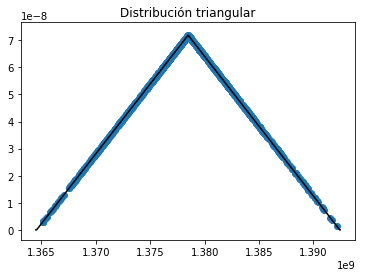

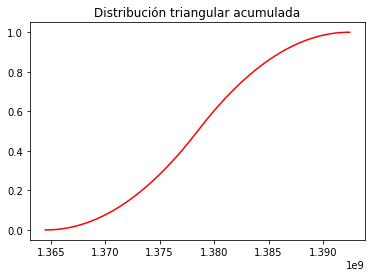

P(T<=1385478000)= 0.8761541046883046


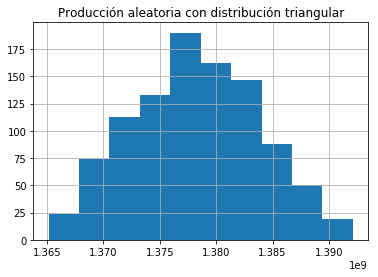

1378136745.2435431

In [57]:
a, b, c = 1364571498, 1378487702, 1392403906
loc = a; scale = c-loc; c2 = (b-loc)/scale
x = np.arange(1364500000,1392450000,100) 
plt.plot(x, st.triang.pdf(x, c2,loc=loc,scale=scale), 'k')
muestras = st.triang.rvs(c2,loc=loc,scale=scale,size=1000) #Simulación de producciones
plt.scatter(muestras, st.triang.pdf(muestras, c2,loc=loc,scale=scale)) #
plt.title('Distribución triangular')
plt.show()
P = st.triang.cdf(1385478000,c2,loc=loc,scale=scale) #El 370 puede cambiar, depende de la probabilidad que se pretenda analizar.
plt.plot(x,st.triang.cdf(x, c2,loc=loc,scale=scale),'r')
plt.title('Distribución triangular acumulada')
plt.show()
print('P(T<=1385478000)=',P)
plt.hist(muestras)
plt.grid()
plt.title('Producción aleatoria con distribución triangular')
plt.show()
np.mean(muestras) # Promedio de producción a partir de la simulación

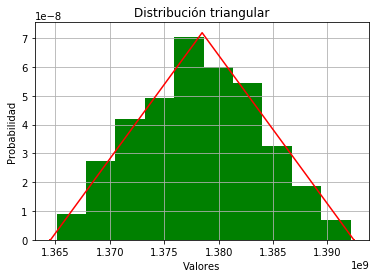

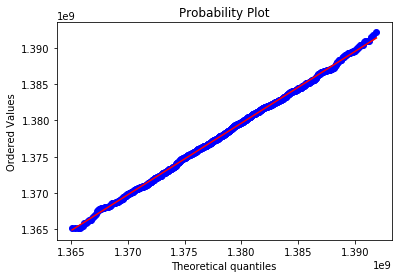

In [58]:
# Comprobando que distribuya triangular
plt.hist(muestras,density=True, color = 'g')
y = st.triang.pdf(x, c2,loc=loc,scale=scale)
plt.plot(x,y,'r-')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.title('Distribución triangular')
plt.grid()
plt.show()

# Verificar si los datos se ajustan a una distribucion triangular
tr = st.probplot(muestras, sparams=(c2,loc,scale), dist=st.triang, plot=plt)
plt.show()

Después del ajuste podemos observar que los datos actúan acorde a la distribución triangular .